In [5]:
using Pkg
if isfile("../Project.toml") && isfile("../Manifest.toml")
    Pkg.activate("..");
end

function printer(x::Any, verbose="")
    if verbose != ""
        println(verbose)
    end
    show(stdout, "text/plain", x)
    println("")
end

using Plots, Random, Distributions, LinearAlgebra, JuliaProbo
gr();

 Activating environment at `~/Programming/julia/notebook/JuliaProbo/Project.toml`


┌ Info: Saved animation to 
│   fn = /home/mamoru/Programming/julia/notebook/JuliaProbo/notebook/ch4_sim5.gif
└ @ Plots /home/mamoru/.julia/packages/Plots/6EMd6/src/animation.jl:104


Plots.AnimatedGif("/home/mamoru/Programming/julia/notebook/JuliaProbo/notebook/ch4_sim5.gif")
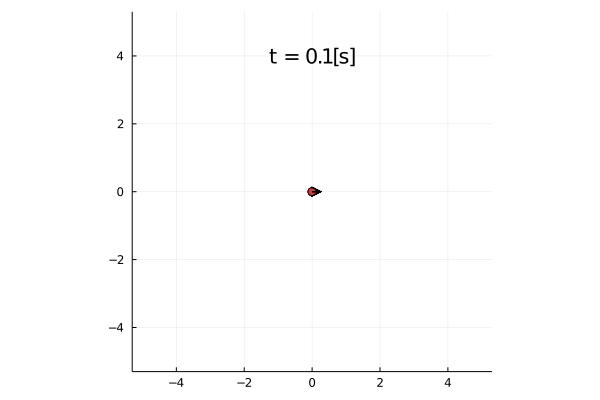

In [6]:
xlim = [-5.0, 5.0]
ylim = [-5.0, 5.0]
world = World(xlim, ylim)

circling_agent = Agent(0.2, 10.0 / 180 * pi)
robots = Array{RealRobot, 1}(undef, 0)
for i in 1:10
    robot = RealRobot([0.0, 0.0, 0.0], circling_agent, nothing;
        radius=0.05, color="gray", noise_per_meter=0.0,
        bias_rate_stds=(0.0, 0.0), expected_kidnap_time=5.0)
    push!(robots, robot)
    push!(world, robot)
end
ideal_robot = IdealRobot([0.0, 0.0, 0.0], circling_agent, nothing,
    0.05, "red")
push!(world, ideal_robot)

dt = 0.1
anim = @animate for i in 1:100
    annota = "t = $(round(dt * i, sigdigits=3))[s]"
    p = draw(world, annota)
    for j in 1:10
        obsv = observations(robots[j].sensor_, robots[j].pose_)
        v, ω = decision(circling_agent, obsv)
        state_transition(robots[j], v, ω, dt)
    end
    obsv = observations(ideal_robot.sensor_, ideal_robot.pose_)
    v, ω = decision(circling_agent, obsv)
    state_transition(ideal_robot, v, ω, dt)
end
gif(anim, "ch4_sim5.gif", fps=10)